In [1]:
from stylecopypaste.datasets.taco import taco

In [2]:
taco_samps = taco(r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\TACO\TACO-master\data")
#rang = range(0,1500)# all samples
ids = range(100,110)
taco_samps.getTaco(ids)

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.53it/s]


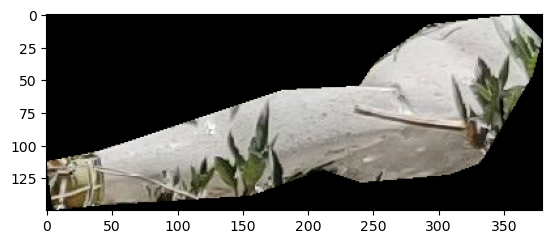

In [3]:
import matplotlib.pyplot as plt
plt.imshow(taco_samps.litIms[1])

In [4]:
from stylecopypaste.copypaste.paste import rand_paste

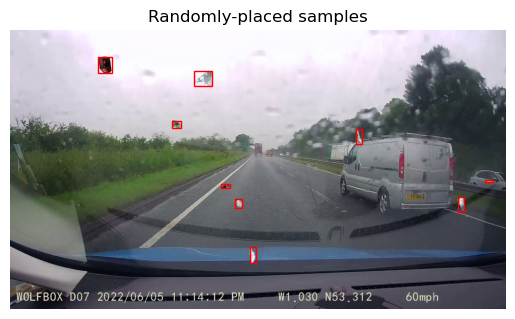

In [5]:
#reads verge image
import cv2

def getVerge(p):
    return cv2.cvtColor(cv2.imread(p),cv2.COLOR_BGR2RGB)

verge = getVerge(r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\segmentation\seg_dataset\gv_seg\20220605231413_000097_Trim_frame2.jpg")

sampIms = taco_samps.litIms; sampMasks = taco_samps.litMasks

result = rand_paste(sampIms,sampMasks,verge,show=True, rotate=True)

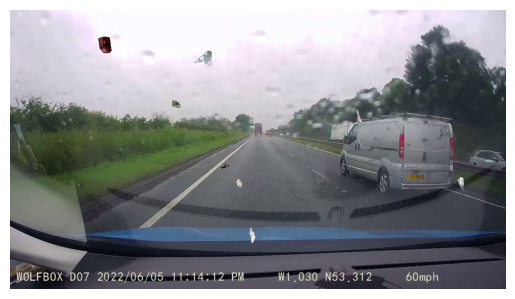

In [6]:
plt.axis('off')
plt.imshow(result)

In [7]:
from stylecopypaste.points.centrepoints import points
ps = points(r"C:\Users\Computing\OneDrive - University of Lincoln\MSc Intelligent Vision\Project\copy-paste\Training02.csv")
x,y = ps.denorm_centres(verge.shape)

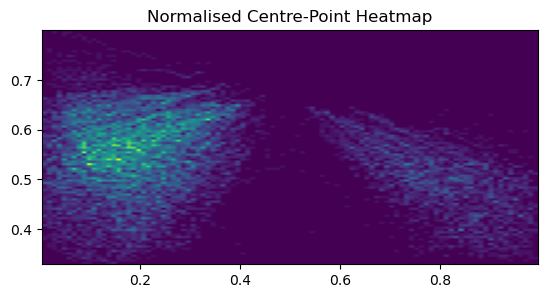

In [8]:
ps.show_centres()

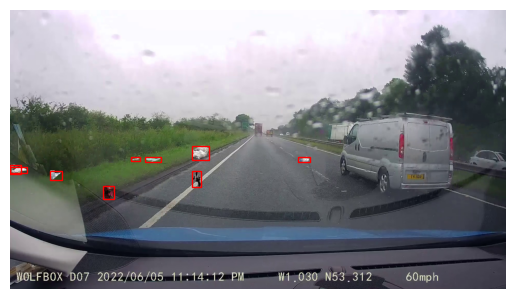

In [11]:
from stylecopypaste.copypaste.paste import points_paste
result = points_paste(sampIms,sampMasks,verge,x,y,show=True, rotate=True)

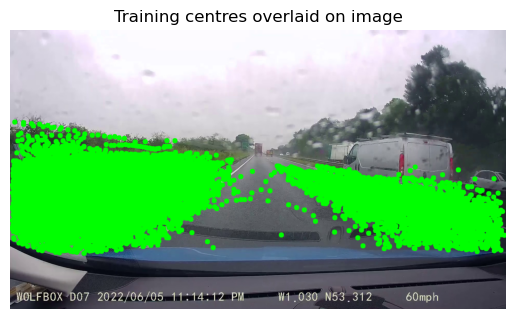

In [12]:
ps.show_centres_overlay(verge,x,y,"Training centres overlaid on image")

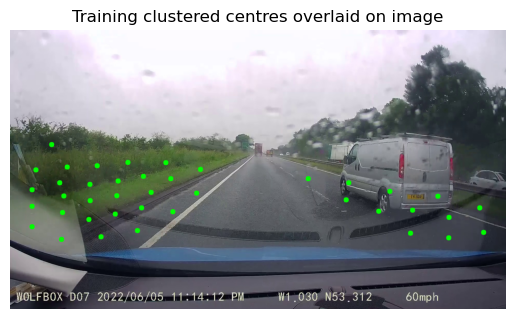

In [13]:
kx, ky = ps.getClusters(40,0)
denormx, denormy = ps.denorm_centres(verge.shape,kx,ky)
ps.show_centres_overlay(verge,denormx,denormy,"Training clustered centres overlaid on image")

In [12]:
#add segmenting & style to package
#create datasets